In [29]:
from scipy.stats import dirichlet
import numpy as np
from torchvision import datasets, transforms
import torchvision

from sklearn.model_selection import train_test_split
from naive_bayes_model import CategoricalNaiveBayes

import plotly.express as px
import pandas as pd
import random
import matplotlib.pyplot as plt

In [23]:
def get_data(data, indices=None, binarize=True):
    N = len(data)
    if indices is None:
        indices = range(0, N)

    # Extract the Xs or the images
    X = np.stack([data[i][0].numpy() for i in indices], axis=1).squeeze(0) # (N,28,28)
    if binarize:
        X = (X > 0.5)
        X = X.astype(int)
    
    # Now extract the Ys or the labels of the images
    y = np.array([data[i][1] for i in indices])

    return X, y

In [24]:
## Dataset Prep
transform=transforms.Compose([lambda img: torchvision.transforms.functional.rotate(img, -90),
                                transforms.RandomHorizontalFlip(p=1),
                                transforms.ToTensor()])

data = datasets.EMNIST(
    root="./data",
    split="balanced",
    download=True,
    transform=transform
)

X, y = get_data(data, binarize=True)

In [55]:
X.shape

(112800, 28, 28)

In [64]:
learning_df = pd.DataFrame(columns = ['Dirchlet Proportion', 'Accuracy', 'Train/Test', 'Pixel Prior'])
class_proportion = [0.1, 0.2, 0.5, 1, 10, 100]
pixel_prior = [1.01, 1.2, 2, 10, 100]
n_classes = len(np.unique(y))

for cp in class_proportion:
    sample_rate = dirichlet.rvs([cp] * n_classes, size=1)[0]
    X_train = []
    y_train = []
    # loop through and get the corresponding number of samples from each class
    for c, sr in enumerate(sample_rate):
        pseudo_count = 0
        class_mask = (y == c) # in the labels array marks True if C matches the class
        class_features = X[class_mask] # gets all the samples matching the class C
        
        # now generate a mask for the sample rate
        for cf in class_features:
            if random.uniform(0, 1) < sr:
                X_train.append(cf)
                y_train.append(c)
            if pseudo_count == 0:
                X_train.append(cf)
                y_train.append(c)
                pseudo_count = 1
                
    X_train = np.stack(X_train)
    y_train = np.array(y_train)
    
    for p in pixel_prior:
        model = CategoricalNaiveBayes(b_i=p, b_j=p, use_map=True)
        model.fit(X_train, y_train)
        learning_df = learning_df.append([{'Dirchlet Proportion': cp, 'Accuracy': model.score(X_train, y_train), 'Train/Test': 'Train Score', 'Pixel Prior': p}])
        learning_df = learning_df.append([{'Dirchlet Proportion': cp, 'Accuracy': model.score(X, y), 'Train/Test': 'Test Score', 'Pixel Prior': p}])

/tmp/ipykernel_1121035/4027519234.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_1121035/4027519234.py:33: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_1121035/4027519234.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_1121035/4027519234.py:33: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_1121035/4027519234.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_1121035/4027519234.py:33: FutureWarning:

The frame.append method is deprecated and will be removed from 

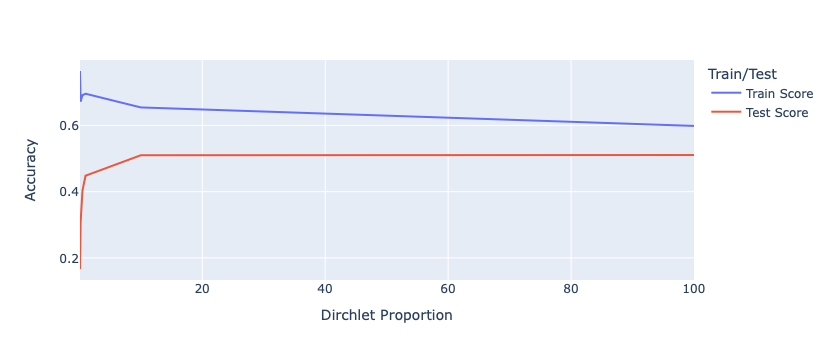

In [63]:
fig = px.line(learning_df, x='Dirchlet Proportion', y='Accuracy', color='Pixel Prior', line_dash='Train/Test')
fig.show()

In [ ]:
learning_df = pd.DataFrame(columns = ['Class Proportion', 'Pixel Prior', 'Accuracy', 'Train/Test'])

pixel_prior = [1.01, 1.2, 2, 10, 100]
class_proportion = [0.1, 0.2, 0.5, 1, 10, 100]
n_classes = len(np.unique(y))



for cp in class_proportion:
    dirichlet.rvs([cp] * n_classes, size=1)
    for beta in pixel_prior:
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, random_state=0)
        model = CategoricalNaiveBayes()
        model.fit(X_train, y_train)
        

for s in sizes:
    

    learning_df = learning_df.append([{'Training Samples': s, 'Accuracy': model.score(X_train, y_train), 'Train/Test': 'Train Score'}])
    learning_df = learning_df.append([{'Training Samples': s, 'Accuracy': model.score(X_test, y_test), 'Train/Test': 'Test Score'}])


In [ ]:
alpha = 1

dirichlet.rvs([alpha] * )